In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [3]:
start= '2010-01-01'
end = '2020-12-31'

df = data.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.426000
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526021
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537303
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433319
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421426


In [4]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,130.620895
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,135.292679
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,133.491257
2020-12-30,135.990005,133.399994,135.580002,133.720001,96452100.0,132.352997
2020-12-31,134.740005,131.720001,134.080002,132.690002,99116600.0,131.333557


In [5]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.426000
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526021
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537303
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433319
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421426


In [6]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


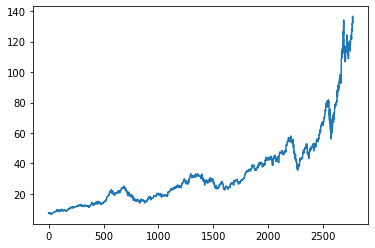

In [7]:
plt.plot(df.Close)

In [8]:
df

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0
...,...,...,...,...,...
2765,133.460007,131.100006,131.320007,131.970001,54930100.0
2766,137.339996,133.509995,133.990005,136.690002,124486200.0
2767,138.789993,134.339996,138.050003,134.869995,121047300.0
2768,135.990005,133.399994,135.580002,133.720001,96452100.0


In [9]:
ma100 = df.Close.rolling(30).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2765    122.509333
2766    123.092000
2767    123.612333
2768    124.059666
2769    124.503000
Name: Close, Length: 2770, dtype: float64

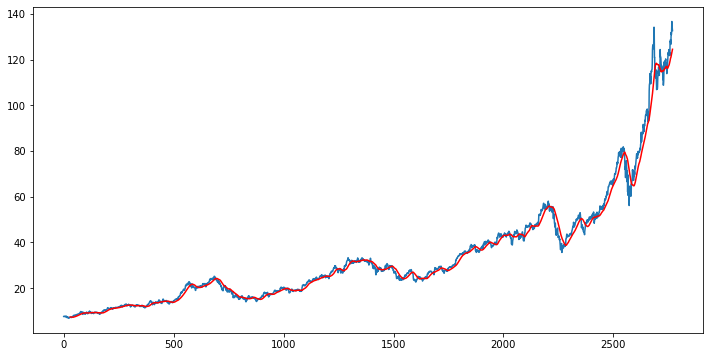

In [10]:
plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [11]:
ma200 = df.Close.rolling(30).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2765    122.509333
2766    123.092000
2767    123.612333
2768    124.059666
2769    124.503000
Name: Close, Length: 2770, dtype: float64

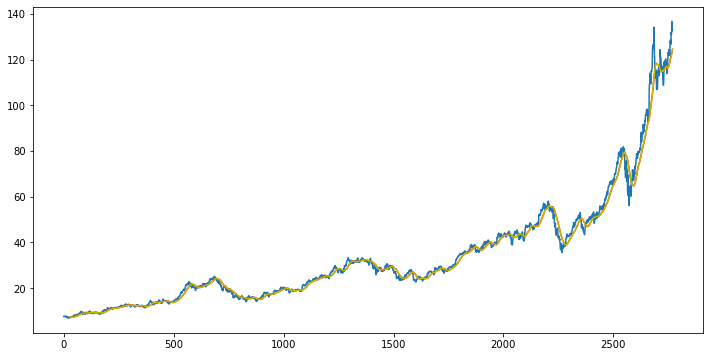

In [12]:
plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'y')

In [13]:
df.shape

(2770, 5)

# Splitting data into Training and Testing

In [14]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1938, 1)
(832, 1)


In [15]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [16]:
data_testing.head()

,Close
1938,39.912498
1939,39.570000
1940,39.970001
1941,39.667500
1942,39.682499


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [18]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01953359],
       [0.02296349],
       [0.0233504 ],
       ...,
       [0.96032627],
       [0.98133429],
       [0.97664957]])

In [19]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100 : i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [24]:
x_train.shape

(1838, 100, 1)

# ML Model

In [20]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [21]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, 
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [27]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
58/58 [==============================] - 19s 189ms/step - loss: 0.0500
Epoch 2/50
58/58 [==============================] - 8s 145ms/step - loss: 0.0086
Epoch 3/50
58/58 [==============================] - 8s 130ms/step - loss: 0.0078
Epoch 4/50
58/58 [==============================] - 7s 129ms/step - loss: 0.0068
Epoch 5/50
58/58 [==============================] - 7s 125ms/step - loss: 0.0064
Epoch 6/50
58/58 [==============================] - 7s 120ms/step - loss: 0.0066
Epoch 7/50
58/58 [==============================] - 7s 119ms/step - loss: 0.0053
Epoch 8/50
58/58 [==============================] - 7s 120ms/step - loss: 0.0053
Epoch 9/50
58/58 [==============================] - 7s 120ms/step - loss: 0.0054
Epoch 10/50
58/58 [==============================] - 7s 123ms/step - loss: 0.0053
Epoch 11/50
58/58 [==============================] - 7s 120ms/step - loss: 0.0056
Epoch 12/50
58/58 [==============================] - 8s 132ms/step - loss: 0.0050
Epoch 13/50
58/58 [=====

In [28]:
model.save('keras_model.h5')

In [29]:
data_testing.head()

,Close
1938,39.912498
1939,39.570000
1940,39.970001
1941,39.667500
1942,39.682499


In [30]:
data_training.tail(100)

,Close
1838,35.567501
1839,35.910000
1840,36.132500
1841,35.919998
1842,35.947498
...,...
1933,40.477501
1934,40.314999
1935,39.657501
1936,40.375000


In [31]:
past_100_days = data_training.tail(100)

In [32]:
final_df = past_100_days.append(data_testing, ignore_index = True)

In [34]:
final_df.head()

,Close
0,35.567501
1,35.910000
2,36.132500
3,35.919998
4,35.947498


In [36]:
input_data = scaler.fit_transform(final_df)
input_data

array([[1.97745334e-04],
       [3.58404460e-03],
       [5.78390957e-03],
       [3.68289840e-03],
       [3.95479352e-03],
       [3.60874862e-03],
       [1.08510253e-02],
       [1.31497441e-02],
       [1.20374596e-02],
       [1.07274298e-02],
       [1.67338264e-02],
       [2.67444246e-02],
       [2.91667767e-02],
       [2.73623646e-02],
       [2.90678851e-02],
       [3.43821920e-02],
       [3.33934653e-02],
       [3.28249711e-02],
       [1.99223803e-02],
       [2.55826944e-02],
       [2.68680202e-02],
       [2.91667767e-02],
       [2.86971362e-02],
       [2.75601100e-02],
       [2.88701398e-02],
       [2.82274958e-02],
       [2.83757953e-02],
       [2.61264846e-02],
       [2.71646193e-02],
       [3.27755253e-02],
       [2.90184394e-02],
       [3.03037652e-02],
       [3.25777800e-02],
       [3.16385368e-02],
       [1.67832345e-02],
       [7.98377455e-03],
       [1.08757293e-02],
       [7.34113050e-03],
       [5.19067357e-03],
       [1.97745334e-04],


In [38]:
input_data.shape

(932, 1)

In [39]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i - 100 : i])
    y_test.append(input_data[i, 0])

In [40]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(832, 100, 1)
(832,)


# Making Prediction

In [41]:
y_predicted = model.predict(x_test)

26/26 [==============================] - 3s 79ms/step


In [42]:
y_predicted.shape

(832, 1)

In [43]:
y_test

array([0.04315691, 0.03977061, 0.04372544, 0.0407346 , 0.0408829 ,
       0.03430804, 0.02768371, 0.02397607, 0.02066392, 0.02706577,
       0.02975997, 0.02741181, 0.02948808, 0.02872184, 0.03037791,
       0.02790615, 0.03262723, 0.03240478, 0.03373951, 0.03388781,
       0.03549448, 0.034135  , 0.03658206, 0.04372544, 0.04518377,
       0.04342881, 0.03408556, 0.03475294, 0.0345552 , 0.03685395,
       0.03514843, 0.03762019, 0.05156092, 0.06063227, 0.06636674,
       0.06105247, 0.06406802, 0.07491904, 0.07924462, 0.0806288 ,
       0.08416344, 0.0832736 , 0.08028276, 0.07855253, 0.07205179,
       0.06646563, 0.07145859, 0.06911039, 0.0686902 , 0.07650097,
       0.08099959, 0.08102429, 0.07884913, 0.07632796, 0.06745432,
       0.07331241, 0.071335  , 0.0682453 , 0.06784981, 0.06629259,
       0.06705886, 0.06718242, 0.07533924, 0.07294163, 0.07435055,
       0.07422695, 0.07855253, 0.08460834, 0.07996142, 0.07949181,
       0.08112315, 0.08112315, 0.07014856, 0.07022271, 0.07140

In [44]:
y_predicted

array([[0.11133298],
       [0.11142179],
       [0.11145413],
       [0.11142109],
       [0.11133437],
       [0.11119479],
       [0.11100627],
       [0.11076288],
       [0.11045136],
       [0.1100633 ],
       [0.10959272],
       [0.10906382],
       [0.10851008],
       [0.10795186],
       [0.10741511],
       [0.10691336],
       [0.10646448],
       [0.10606393],
       [0.10572466],
       [0.10544786],
       [0.10523741],
       [0.10509035],
       [0.10500965],
       [0.10498452],
       [0.10500476],
       [0.10508436],
       [0.10523492],
       [0.10546446],
       [0.10573724],
       [0.10602868],
       [0.10631263],
       [0.10657921],
       [0.10681258],
       [0.10700192],
       [0.10718319],
       [0.10740817],
       [0.10773547],
       [0.10817972],
       [0.10875413],
       [0.1094967 ],
       [0.11040938],
       [0.11148666],
       [0.11273426],
       [0.11412916],
       [0.11562188],
       [0.11714324],
       [0.11859974],
       [0.119

In [45]:
scaler.scale_

array([0.00988704])

In [46]:
scale_factor = 1/0.00988704
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

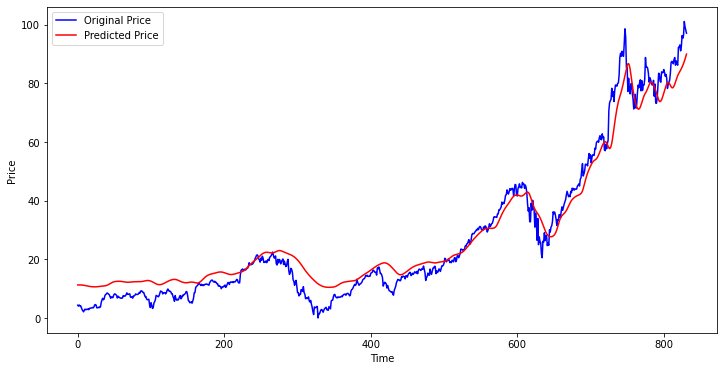

In [47]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_predicted, 'r', label = 'Predicted Price')

plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()